# Google Trends Web data analysis

The code which follows analyes the google trends web data

In [41]:
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [42]:
# let's get the years
years = [ i for i in range(2020, 2026)]

In [43]:
def prepare_file(flepath):
    if os.path.exists(filepath):
        with open(filepath, 'r') as file:
            content = file.read()
        file.close()

        content_list = content.split('\n')

        new_content_list  = [line for line in content_list if line != 'Category: Health' and line != '']

        content = '\n'.join(new_content_list)

        with open(filepath, 'w') as file:
            file.write(content)



In [44]:
data_trends_file = '../data/google-trends-data.csv'
if os.path.exists(data_trends_file):
    catalogs = []

    for y in years:
        filepath = f"../data/multiTimeline_{y}.csv"

        if os.path.exists(filepath):
            prepare_file(filepath)

            catalogs.append(pd.read_csv(filepath))

    df = pd.concat(catalogs)
    df.to_csv(data_trends_file)


In [45]:
df = pd.read_csv(data_trends_file)
df.head(20)

,Unnamed: 0,Week,COVID-19: (New York NY)
0,0,2019-12-29,0
1,1,2020-01-05,0
2,2,2020-01-12,0
3,3,2020-01-19,0
4,4,2020-01-26,0
5,5,2020-02-02,0
6,6,2020-02-09,<1
7,7,2020-02-16,<1
8,8,2020-02-23,2
9,9,2020-03-01,7


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               265 non-null    int64 
 1   Week                     265 non-null    object
 2   COVID-19: (New York NY)  265 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.3+ KB


In [47]:
# let's see if we can convert that covid-19 feature to a numeric fields
df['search_factor'] = df['COVID-19: (New York NY)'].apply(lambda x: int(x) if x.isdigit() else 0)

In [48]:
df.head(20)

,Unnamed: 0,Week,COVID-19: (New York NY),search_factor
0,0,2019-12-29,0,0
1,1,2020-01-05,0,0
2,2,2020-01-12,0,0
3,3,2020-01-19,0,0
4,4,2020-01-26,0,0
5,5,2020-02-02,0,0
6,6,2020-02-09,<1,0
7,7,2020-02-16,<1,0
8,8,2020-02-23,2,2
9,9,2020-03-01,7,7


In [49]:
def normalizeDF(tdf, features):
    # create the scaler
    scaler = MinMaxScaler()
    
    # create a list of the normalized feature names
    norm_features = []
    for feature in features:
        feature_name = 'norm_' + feature
        
        norm_features.append(feature_name.lower());
        
    # normalize the features
    tdf.loc[:, norm_features] = scaler.fit_transform(tdf[features])

    # return the dataframe
    return tdf

In [50]:
working_df = normalizeDF(df, ['search_factor'])

In [51]:
working_df.head(20)

,Unnamed: 0,Week,COVID-19: (New York NY),search_factor,norm_search_factor
0,0,2019-12-29,0,0,0.00
1,1,2020-01-05,0,0,0.00
2,2,2020-01-12,0,0,0.00
3,3,2020-01-19,0,0,0.00
4,4,2020-01-26,0,0,0.00
5,5,2020-02-02,0,0,0.00
6,6,2020-02-09,<1,0,0.00
7,7,2020-02-16,<1,0,0.00
8,8,2020-02-23,2,2,0.02
9,9,2020-03-01,7,7,0.07


Now that we have done some preprocessing on the values, let's do some EDA on the general shape of the data.

## Histogram

In [52]:
import matplotlib

<Axes: title={'center': 'Searches on COVID-19'}, ylabel='Frequency'>

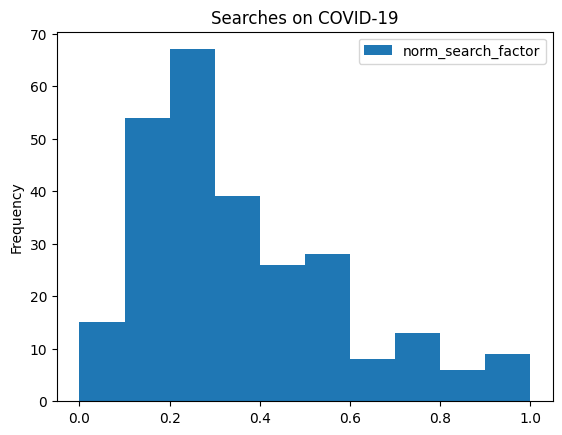

In [54]:
working_df[['norm_search_factor']].plot(kind="hist", title="Searches on COVID-19")

The histogram illustrates a right-skewed distribution with most values concentrated at lower levels and a long tail extending toward higher values. This pattern suggests a median with a lot of variability, and presence of high-end outliers. Let's draw up a box plot to test those findings.

## Box and whiskers

<Axes: title={'center': 'Searchs on COVID-19'}>

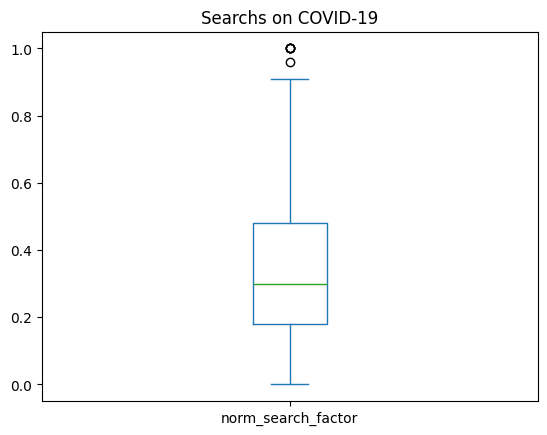

In [55]:
working_df[['norm_search_factor']].plot(kind="box", title="Searchs on COVID-19")

As it turns out, it does not have a lot of outliers, but the ones that exist are on the high-end. It has a longer upper quartile because of greater variability above the median.

## Line Graph

<Axes: xlabel='Week'>

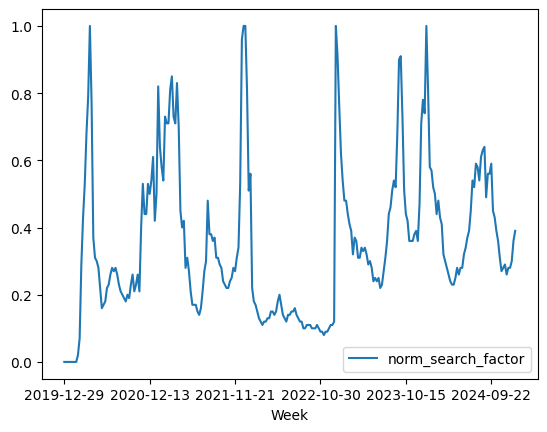

In [56]:
working_df.plot(kind="line", x="Week", y="norm_search_factor")